# Create CNN Model
This notebook is a combination of works with the first being the https://www.tensorflow.org/tutorials/load_data/images and the next being the SVRIMG https://github.com/ahaberlie/SVRIMG/blob/master/examples/Train_Model.ipynb

In [1]:
import pandas as pd
import numpy as np
import glob
import PIL

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

## Obtain Data

In [2]:
results = pd.read_csv('/home/jovyan/Thesis/data/classifications_spc_actual_tornadoes.csv')
results

,UNID,Class Code,Class Name,om,tz,st,stf,stn,mag,inj,...,f3,f4,fc,init_date,fmt_date,date_utc,yr,mo,dy,hr
0,199601030010z000000859,0,isolated_cell,859,3,SC,45,1,0,0,...,0,0,0,1996-01-02-18:10:00,1/2/1996 18:10,1/3/1996 0:10,1996,1,3,0
1,199601030020z000000860,0,isolated_cell,860,3,SC,45,2,0,0,...,0,0,0,1996-01-02-18:20:00,1/2/1996 18:20,1/3/1996 0:20,1996,1,3,0
2,199605022300z000000295,0,isolated_cell,295,3,MN,27,1,0,0,...,0,0,0,1996-05-02-17:00:00,5/2/1996 17:00,5/2/1996 23:00,1996,5,2,23
3,199605150140z000000715,0,isolated_cell,715,3,OK,40,20,0,0,...,0,0,0,1996-05-14-19:40:00,5/14/1996 19:40,5/15/1996 1:40,1996,5,15,1
4,199605160408z000000190,0,isolated_cell,190,3,NE,31,6,0,0,...,0,0,0,1996-05-15-22:08:00,5/15/1996 22:08,5/16/1996 4:08,1996,5,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5784,201710082137z000615804,5,tropical,615804,3,SC,45,0,1,0,...,0,0,0,2017-10-08-15:37:00,10/8/2017 15:37,10/8/2017 21:37,2017,10,8,21
5785,201710082140z000615805,5,tropical,615805,3,NC,37,0,1,0,...,0,0,0,2017-10-08-15:40:00,10/8/2017 15:40,10/8/2017 21:40,2017,10,8,21
5786,201710082151z000615806,5,tropical,615806,3,NC,37,0,0,0,...,0,0,0,2017-10-08-15:51:00,10/8/2017 15:51,10/8/2017 21:51,2017,10,8,21
5787,201710082201z000615807,5,tropical,615807,3,NC,37,0,1,0,...,0,0,0,2017-10-08-16:01:00,10/8/2017 16:01,10/8/2017 22:01,2017,10,8,22


In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  f'/home/jovyan/Thesis/data/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(136, 136),
  batch_size=57)

Found 5789 files belonging to 7 classes.
Using 4632 files for training.


2023-06-26 22:04:09.303751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:952] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-26 22:04:09.318485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:952] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-26 22:04:09.318667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:952] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-26 22:04:09.319755: I tensorflow/core/platform/cpu_feature_guard.cc:152] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate 

In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  f'/home/jovyan/Thesis/data/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(136, 136),
  batch_size=57)

Found 5789 files belonging to 7 classes.
Using 1157 files for validation.


In [5]:
class_names = train_ds.class_names
class_names[1:]

['isolated_cell',
 'loosely_clustered_cells',
 'multiple_isolated_cells',
 'qlcs',
 'tightly_clustered_cells',
 'tropical']

In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(57, 136, 136, 3)
(57,)


## Create the Model

In [17]:
#Check for GPU access
gpus = tf.config.experimental.list_physical_devices(device_type="GPU")
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [44]:
model = keras.Sequential(
    [
        keras.Input(shape=(136, 136, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.SpatialDropout2D(0.3),
        layers.MaxPooling2D(pool_size=(3, 3)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.SpatialDropout2D(0.3),
        layers.MaxPooling2D(pool_size=(3, 3)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.SpatialDropout2D(0.3),
        layers.MaxPooling2D(pool_size=(3, 3)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.6),
        #layers.Dense(6, activation="sigmoid"),
        layers.Dense(6, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 134, 134, 32)      896       
                                                                 
 spatial_dropout2d_12 (Spati  (None, 134, 134, 32)     0         
 alDropout2D)                                                    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 44, 44, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 42, 42, 64)        18496     
                                                                 
 spatial_dropout2d_13 (Spati  (None, 42, 42, 64)       0         
 alDropout2D)                                                    
                                                      

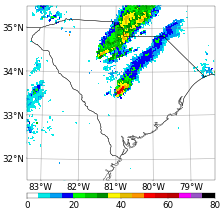

In [15]:
object = PIL.Image.open(f'/home/jovyan/Thesis/data/isolated_cell/199601030010z000000859.png')
object

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [45]:
epochs = 100
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


#model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  workers=8
)

Epoch 1/100
82/82 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.0017 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
82/82 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
82/82 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
82/82 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
82/82 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
82/82 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100
82/82 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
E

In [38]:
num_classes = 6

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [41]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])



In [42]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
82/82 [==============================] - 1s 9ms/step - loss: nan - accuracy: 8.6356e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/3
82/82 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/3
82/82 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00


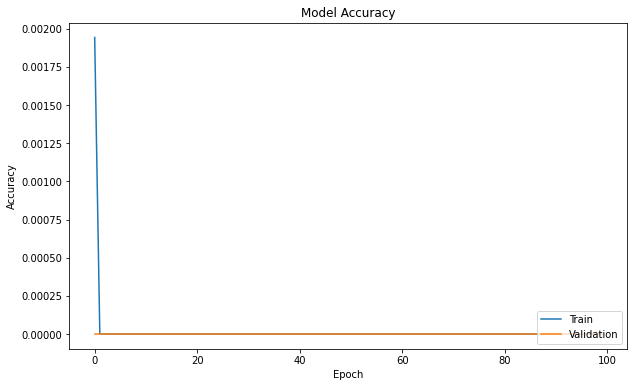

In [34]:
#plot the training and validation accuracy
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 6

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [46]:
model.save("/home/jovyan/Thesis/model/test.h5")

In [ ]:
epochs = 100
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(datagen.flow(img_train, y_train, batch_size=32),
                                 epochs=epochs, validation_data=(img_val, y_val), workers=8)

In [ ]:
import pandas as pd
from svrimg.utils.get_images import get_img_list
from svrimg.mapping.map_helper import draw_box_plot
from svrimg.analysis.pmmean import _run_pmm_one_variable

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 25, 25
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

results = pd.read_csv('/home/jovyan/Thesis/data/classifications_spc_actual_tornadoes.csv')

i = [8, 7, 5, 4, 2, 1]

try:
    for cls in ["isolated_cell", "multiple_isolated_cells", "loosely_clustered_cells", 
                "tightly_clustered_cells", "qlcs", "tropical"]:
        
        sub = results[results["Class Name"]==cls].copy()
        
        imgs = get_img_list(sub['UNID'], "/home/jovyan/SVRIMG/data/tor/")
        
        img = _run_pmm_one_variable(imgs)
        
        ax = plt.subplot(4, 3, i.pop())
        
        ax = draw_box_plot(ax, img, cbar_shrink=0.8)
    
        ax.set_title(cls, fontsize=20)
        
        ax.text(0, 130, "n={}".format(len(imgs)), fontsize=20)
    
    plt.tight_layout()

except:
    pass

In [ ]:
results['Class Name'].unique()

In [ ]:
results['UNID'][0][:4]

In [ ]:
img_name

In [ ]:
sub.index.values